# Периодические граничные условия

Периодические граничные условия описываются следующим образом:

Пусть бесконечная периодическая структура задана векторами трансляции $\vec{a}$, $\vec{b}$, $\vec{c}$ и точкой $r$.

Тогда произвольную точку $r'$ данной структуру можно описать выражением:

$ r' = r + n_1\vec{a} + n_2\vec{b} + n_3\vec{c}, $

где $n_1$, $n_2$, $n_3$ - произвольные целые числа.

Для того, чтобы рассмотреть примеры нам понадобятся 4 библиотеки:

In [ ]:
import pandas as pd
import numpy as np
from itertools import product, combinations, permutations, combinations_with_replacement
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Одномерный случай

В одномерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен одним числом $n$ и одним вектором $\vec{a}$,

и приобретает вид:

$T = n*\vec{a}$

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого одномерного случая:

$ r' = r + n\vec{a}, $
- где $n$ - любое произвольное число

Зададим периодические граничные условия, описывающее любую точку рассматриваемого пространства и

поместим объект - материальную точку $r$ с координатой $[0]$ - в структуру, заданую вектором трансляции $T = [1]$ ($\vec{a} = [1]$).

Зададим `x = 0` в точке пространства, определяемой числом `n = 0` (трансляция точки в себя)

In [ ]:
# Translation vector a
a =np.array([1])

# Coordinate of defined point (1 dimentional)
r = np.array([0])

# Structural scaling factors
n = [0]

Значение функции описывающей периодические граничные условия:

`r_prime = r + n*a`

зависит только от задаваемой точки $r$, набора трансляций $n$ и вектора трансляции $\vec{a}$

In [ ]:
def plot_1dim(a,r,n):
    # Periodic Boundary Conditions (PBC)
    r_prime = r + n*a

    # Plotting params without any physical information
    fig, ax = plt.subplots(figsize=(5, 1))
    y = [0]*len(r_prime)
    plt.plot(r_prime,y, 'o')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    plt.show()

Построим:

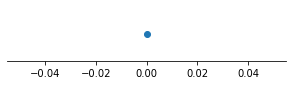

In [ ]:
plot_1dim(a,r,n)

Зададим последовательность чисел n которая определит несклько точек $r`$:

In [ ]:
n = np.arange(-5, 5, 1)

Набор чисел n: [-5 -4 -3 -2 -1  0  1  2  3  4]


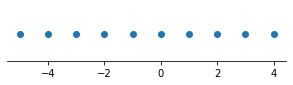

In [ ]:
print(f'Набор чисел n: {n}')
plot_1dim(a,r,n)

Пусть любое число $n_i$ из набора чисел $n$ описывается выражением $n_i=n_{i-1}+1$, для всех $n\in{Z}$ (по определению),

тогда, если бы указанное выражение, описывало кристаллическую структуру, то получено описание бесконечной периодической структуры:

Вектор трансляции: `a = [1]`, с координатами едиственно описанного вида атомов, в базисе {a}: `r=[0]`


## Двумерный случай

В двумерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен двумя числами $n$ и двумя векторами $\vec{a}$ и $\vec{b}$.

Базис приобретает вид:

$T = n_1*\vec{a} + n_2*\vec{b}$

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого **двумерного** случая:

$ r' = r + n_1*\vec{a} + n_2*\vec{b} $
- где $n_i$ - любое произвольное число

Зададим структуру множествами чисел `n_1` и `n_2` в базисе векторов трансляции `a = np.array([1,0])` и `b = np.array([0,1])`

и зададим единственный вид условных атомов точкой `r = 0`

In [ ]:
# Translation vectors a,b
a = np.array([1,0])
b = np.array([0,1])

# Coordinate of defined point (2 dimentional)
r = np.array([0,0])

# translations sets
n_1 = np.arange(-5, 5, 1)
n_2 = np.arange(-5, 5, 1)

Определим функцию для построения двумерной структуры:

In [ ]:
def get_xy(a, b, r, n_1, n_2):
    xes, ycs = [], []
    for n in product(n_1, n_2, repeat=1):
        # Periodic Boundary Conditions (PBC)
        r_prime = r + n[0]*a + n[1]*b
        xes.append(r_prime[0])
        ycs.append(r_prime[1])
    return xes, ycs

Построрим полученный набор точек:

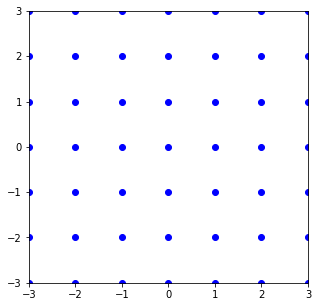

In [ ]:
xes, ycs = get_xy(a, b, r, n_1, n_2)
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes, ycs, 'bo')
plt.xlim(-3,3) ; plt.ylim(-3,3)
plt.show()

## Описание центрированной структуры

Более сложная центрированная структура всё ещё с одним типом атомов:

In [ ]:
a = np.array([1,0])
b = np.array([0,1])

r_1 = [0.0,0.0] # corner site atom
r_2 = [0.5,0.5] # centered atom

# translation sets
n_1 = np.arange(-4, 4, 1)
n_2 = np.arange(-4, 4, 1)

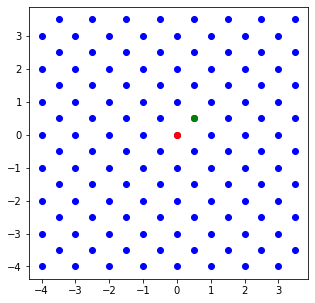

In [ ]:
xes_1, ycs_1 = get_xy(a, b, r_1, n_1, n_2)
xes_2, ycs_2 = get_xy(a, b, r_2, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'bo')

# Original points
plt.plot([r_1[0]],[r_1[1]], 'ro')
plt.plot([r_2[0]],[r_2[1]], 'go')

plt.show()

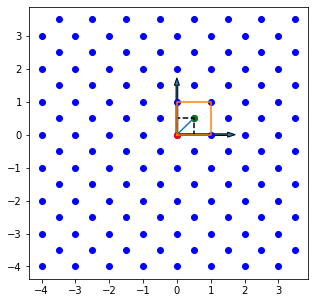

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

# All obtained points
plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'bo')

# Original points
plt.plot([r_1[0]],[r_1[1]], 'ro')
plt.plot([r_2[0]],[r_2[1]], 'go')

# Periodic set
fx_set = [r_1[0], r_2[0]]
fy_set = [r_1[1], r_2[1]]
plt.plot(fx_set, fy_set)

# Periodic cell boundaries
px_set = [r_1[0], r_1[0]+a[0]/2, r_1[0]+a[0]/2, r_1[0], r_1[0]]
py_set = [r_1[1], r_1[1]+b[0]/2, r_1[1]+b[1]/2, r_1[0]+b[1]/2, r_1[1]]
plt.plot(px_set, py_set, 'k--')

# Conventional cell boundaries
cx_set = [r_1[0], r_1[0]+a[0], r_1[0]+a[0], r_1[0] + b[0], r_1[0]]
cy_set = [r_1[1], r_1[1]+b[0], r_1[1]+b[1], r_1[0] + b[1], r_1[1]]
plt.plot(cx_set, cy_set)

# Translation vectors
plt.arrow(r_1[0], r_1[1], a[0]*1.5, a[1]*1.5, width=0.05)
plt.arrow(r_1[0], r_1[1], b[0]*1.5, b[1]*1.5, width=0.05)

plt.show()

## Двойственность описания структур

Зададим структуру

In [ ]:
# Translation vectors a,b
a = np.array([0.5,0.5])
b = np.array([0,1])

# Coordinates of defined point (2 dimentional)
r = np.array([0,0])

# translations sets
n_1 = np.arange(-8, 8, 1)
n_2 = np.arange(-8, 8, 1)

Вычислим координаты полученные трансляцией

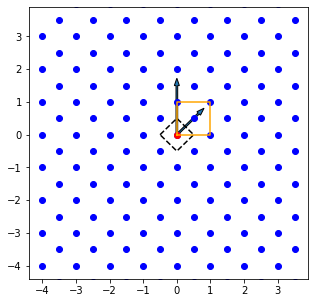

In [ ]:
# Get points
xes, ycs = get_xy(a, b, r, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))

# All obtained points
plt.plot(xes, ycs, 'bo')

# Original point
plt.plot([r[0]],[r_1[1]], 'ro')

# Periodic cell boundaries
px_set = [r[0]-a[0],r[0],      r[0]+a[0], r[0]     , r[0]-a[0]]
py_set = [r[1],     r[1]+a[1], r[1],      r[1]-a[1], r[1]]
plt.plot(px_set, py_set, 'k--')

# Conventional cell
cx_set = [r[0], r[0]+a[0]*2, r[0]+a[0]*2, r[0] + b[0], r[0]]
cy_set = [r[1], r[1]+b[0]*2, r[1]+b[1], r[0] + b[1], r[1]]
plt.plot(cx_set, cy_set, '-', c='orange')

# Translation vectors
plt.arrow(r[0],r[1],a[0]*1.3,a[1]*1.3, width=0.05)
plt.arrow(r[0],r[1],b[0]*1.5,b[1]*1.5, width=0.05)

plt.xlim(-4.4,3.9) ; plt.ylim(-4.4,3.9)
plt.show()

## Несколько сортов атомов

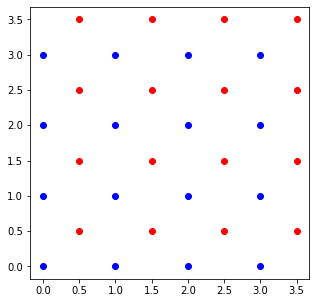

In [ ]:
a = np.array([1,0])
b = np.array([0,1])

r_1 = [0.0,0.0] # corner site atom
r_2 = [0.5,0.5] # centered atom

# translations sets
n_1 = np.arange(0, 4, 1)
n_2 = np.arange(0, 4, 1)

xes_1, ycs_1 = get_xy(a, b, r_1, n_1, n_2)
xes_2, ycs_2 = get_xy(a, b, r_2, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'ro')
plt.show()

---

## Трехмерный случай, с использованием формата записи, аналогичного `POSCAR`:

В формате POSCAR (VASP) вводится так называемый 'scale factor' `s`, который позволяет более явно визуально отразить соотношения векторов трансляции.

При этом наборы трансляций в реальности не нужны (объясняется ниже).

In [ ]:
# scale factor
s = 1

# translations vectors
a = np.array([1.0, 0.0, 0.0])
b = np.array([0.0, 1.0, 0.0])
c = np.array([0.0, 0.0, 1.0])

# points' coordinates
r_1 =  np.array([0.0, 0.0, 0.0])
r_2 =  np.array([0.5, 0.5, 0.5])

# translations sets
n_1 = n_2 = n_3 = np.arange(-3, 4, 1)

В трёхмерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен всеми тремя числами $n$ и всеми тремя векторами $\vec{a}$, $\vec{b}$ и $\vec{c}$.

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого **трёхмерного** случая:

$ r' = r + n_1*\vec{a} + n_2*\vec{b} + n_3*\vec{c} $
- где $n_i$ - любое произвольное число

Определим соответствующую функцию для нахождения координат каждого атома в рассматриваемой структуре:

In [ ]:
def get_xyz(s, a, b, c, r, ns):
    xes, ycs, zds = [], [], []
    for n_i in combinations_with_replacement(n_1, 3):
        # Periodic Boundary Conditions (PBC)
        r_prime = r + n_i[0]*s*a + n_i[1]*s*b + n_i[2]*s*c
        xes.append(r_prime[0])
        ycs.append(r_prime[1])
        zds.append(r_prime[2])
    return xes, ycs, zds

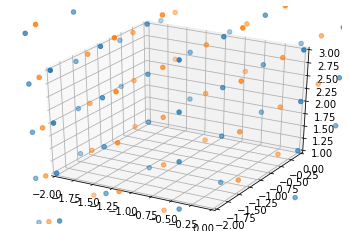

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for r in r_1, r_2:
    xes, ycs, zds = get_xyz(s, a, b, c, r, n_1)
    ax.scatter(xes, ycs, zds)
    plt.xlim(-2,0) ; plt.ylim(-2,0) ; ax.set_zlim(1,3)
plt.show()

# **Практическая работа №1**
**Работа с базами данных материалов: визуализация и интерпретация данных**

*Автор: К.П.Сиднов*

## Введение

***Цель:*** ознакомиться с применением БД для анализа результатов DFT расчетов

***Задачи:***
   1. Ознакомиться с базвыми принципами применения REST API Materials Project.
   2. Ознакомиться с простыми примерами первичной обработки данных для дальнейшего анализа.

***Продолжительность занятия:*** 180 мин.

***Источник:*** https://docs.materialsproject.org/open-apis/the-materials-api/#ssl-encryption
    
    Ong, S. P.; Cholia, S.; Jain, A.; Brafman, M.; Gunter, D.; Ceder, G.; Persson, K. a. The Materials Application Programming Interface (API): A simple, flexible and efficient API for materials data based on REpresentational State Transfer (REST) principles, Comput. Mater. Sci.,2015, 97, 209–215. doi:10.1016/j.commatsci.2014.10.037.

*Дополнительный материал:* https://habr.com/ru/post/468295/

**Что такое REST API:**
1. https://ru.wikipedia.org/wiki/REST
2. https://habr.com/ru/post/483202/

## Общий синтаксис get запросов в REST API *Materials Project*:

`https://www.materialsproject.org/rest/v2/{request_type}[/{identifier}][/{parameters}]`

Первая часть запроса (URI) `https://www.materialsproject.org/rest/v2/`, содержит адрес REST запроса.

- `v2` обозначет 2-ую версию MAPI, эта часть необходима чтобы сделать запросы гибкими в импелементациях в ПО при будущих обновлениях API.

- `{request_type}` определяет информационный раздел или операцию запроса. Поддерживаемые типы запросов: `materials`, `battery`, `reaction`, `mpquery` и `api_check`.

- `{identifier}` идентификатор для специализированных запросов. Зависит от типа запроса `{request_type}`, не является обязательным полем.

- `{parameters}` - запросы дополнительной информации

*Подробнее*: https://docs.materialsproject.org/open-apis/the-materials-api/#ssl-encryption

Перед началом работы получите личный ключ для работы с БД:

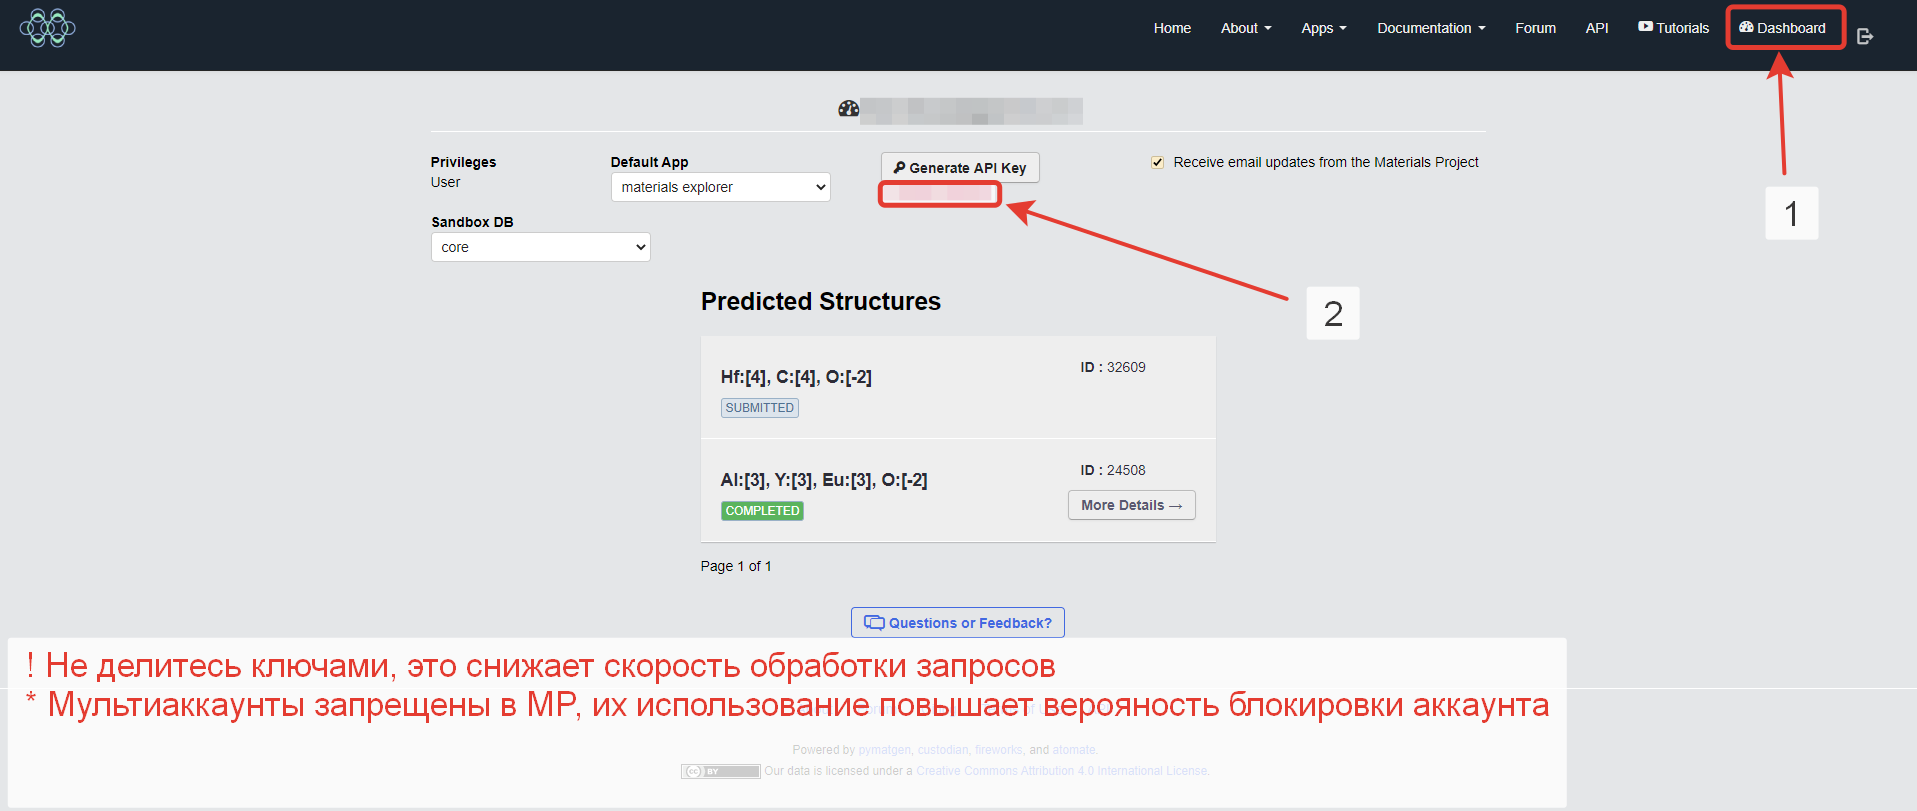

## Получение данных на примере соединений NiAl (1:1)

In [ ]:
import requests as rq
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# key generated from dashboard via web interface of MaterialsProject
x_api_key = '???'  # was updated
header = {'X-API-KEY':x_api_key}

In [ ]:
request_type = 'materials'
formula = 'NiAl'

request_core = 'https://www.materialsproject.org/rest/v2'
simpack = 'vasp'

prefix = '/'.join([request_core, request_type, formula, simpack])
prefix

'https://www.materialsproject.org/rest/v2/materials/NiAl/vasp'

In [ ]:
request = rq.get(prefix, headers=header)
response = request.json()
data = response['response']

In [ ]:
data

[{'energy': -10.84053015,
  'energy_per_atom': -5.420265075,
  'volume': 24.085039035272114,
  'formation_energy_per_atom': -0.6575662599999994,
  'nsites': 2,
  'unit_cell_formula': {'Al': 1.0, 'Ni': 1.0},
  'pretty_formula': 'AlNi',
  'is_hubbard': False,
  'elements': ['Al', 'Ni'],
  'nelements': 2,
  'e_above_hull': 0,
  'hubbards': {},
  'is_compatible': True,
  'spacegroup': {'symprec': 0.1,
   'source': 'spglib',
   'symbol': 'Pm-3m',
   'number': 221,
   'point_group': 'm-3m',
   'crystal_system': 'cubic',
   'hall': '-P 4 2 3'},
  'task_ids': ['mp-990534',
   'mp-990090',
   'mp-993833',
   'mp-992206',
   'mp-1487',
   'mp-1097827',
   'mp-1253398',
   'mp-1254760',
   'mp-1440784',
   'mp-1594868',
   'mp-1591135',
   'mp-1668829'],
  'band_gap': 0.0,
  'density': 5.906844592010392,
  'icsd_id': None,
  'icsd_ids': [602150,
   608785,
   150607,
   151396,
   604356,
   58037,
   608805,
   608802,
   151386],
  'cif': "# generated using pymatgen\ndata_AlNi\n_symmetry_space_

## Поля данных в MP

`energy` - равновесная полная энергия (после полной релаксации) на всю использованную ячейку (см. ниже)

`energy_per_atom` - равновесная полная энергия (после полной релаксации) деленная на число атомов в использованной ячейке

`volume` - объем ячейки ${\buildrel _{\circ} \over {\mathrm{A}}}^3$

`nsites` - число узлов решетки

`unit_cell_formula` - формула элементарной ячейки вещества

`formation_energy_per_atom` - энергия образования вещества приведенная на атом (как полная энергия)

`nsites` - число узлов элементарной ячейки

`unit_cell_formula` - фромула элементарной ячейки (словарь)

`pretty_formula` - фромула элементарной ячейки == формула вещества со стехиметрическими коэффциентами, в которой единичные коэффциенты опускаются (строка)

`elements` - символы элементов периодической таблицы, входящих в состав вещества

`nelements` - число элементов периодической таблицы, входящих в состав вещества

`e_above_hull` = Energy above hull - энергия разложения этого материала на набор наиболее стабильных материалов с данным химическим составом, в эВ / атом. Стабильность проверяется против разложения заданного соединения на все возможные химические комбинации, для которых сумма стехиометрических коэффициентов элементов дает состав исследуемого материала.
  
`spacegroup` - раздел информации о симметрии структуры вещества (словарь)

- `symbol` - обозначение структурного типа периодической структуры
    1. Общее определение: https://ru.wikipedia.org/wiki/Список_кристаллографических_групп
    2. Основные структурные типы и их обозначения: https://ru.wikipedia.org/wiki/Список_структурных_типов
    

- `number`- номер структурного типа периодической структуры

`band_gap` - ширина запрещенной зоны в эВ. Если > 0, то вещество обладает полупроводниковыми свойствами.

`density` - плотность, $г/см^3$

`total_magnetization` - полный магнитный момент, $\mu_B$ (Магнетоны Бора)

`material_id`- уникальный идентификационный номер материала в БД

`elasticity` - раздел информации об упругих свойствах вещества (подробнее о VRH - https://iopscience.iop.org/article/10.1088/0370-1298/65/5/307)

Методика расчета упругих свойств, используемая в MP: https://wiki.materialsproject.org/Elasticity_calculations

- `G_Reuss` - модуль сдвига, ГПа, по A. Reuss, Z. Angew. Math. Mech. 9, 49 (1929) https://doi.org/10.1002/zamm.19290090104

- `G_Voigt` - модуль сдвига, ГПа, по W. Voigt, Lehrbuch der Kristallphysik (B. B. Teubner, Leipzig, 1928), p. 739

- `G_VRH` - модуль сдвига, ГПа, по R.Hill, The Elastic Behaviour of a Crystalline Aggregate, 1952.

- `K_Reuss`- модуль объемной упругости, ГПа, по A. Reuss

- `K_Voigt` - модуль объемной упругости, ГПа, по W. Voigt

- `K_VRH`- модуль объемной упругости, ГПа, по R.Hill

- `elastic_anisotropy` - упругая анизотропия - отличие упругих свойств  в зависимости от направления приложенного усилия

- `elastic_tensor`- тензор упругих постоянных в нотации Фойгта (https://ru.wikipedia.org/wiki/Нотация_Фойгта)

- `poisson_ratio` - коэффициент Пуассона (https://ru.wikipedia.org/wiki/Коэффициент_Пуассона)

- `compliance_tensor` - тензор податливости (https://ru.wikipedia.org/wiki/Нотация_Фойгта)

- `full_formula` - полная химическая формула вещества

Одним из наиболее важных дескрипторов стабильности материалов является параметр $E_{hull}$.

Методика его определения включает перебор всех возможных комбинаций соединений, которые состоят из тех же атомов, что и рассматриваемый материал и в сумме дают те же стехиометрические коэффициенты.
Например, структура $Co_2O_3$ будет проверяться на разложение по сравнению с другими структурами $Co_2O_3$, со смесями $Co$ и $O_2$ и со смесями $CoO$ и $O_2$ (учитывая все степени окисления элементов).

***Если сумма энергий продуктов разложения меньше энергии исследуемого материала, то такое состояние энергетически более выгодно для системы и такой материал - нестабилен***

Положительная $E_{hull}$ указывает на то, что этот материал нестабилен по отношению к разложению.

$E_{hull} = 0$ указывает на то, что это наиболее стабильный материал по своему составу.

Таким образом $E_{hull}$ - это расстояние до выпуклой оболочки потенциальной энергии или, другими словами - разница энергии рассматриваемого материала и такого сочетания веществ, суммарная энергия которого минимальна при заданных стехиометрических соотношениях.

Важно, что эта оболочка представленна только некоторыми точками, т.к. не каждое стехиометрическое соотношение может давать стабильный состав, так же как и не в каждой композиционной точке (~ вертикальной линии) могут вообще существовать вещества.

Поверхность потенциальной энергии для состава $Ni_2AlTi$ выглядит так:

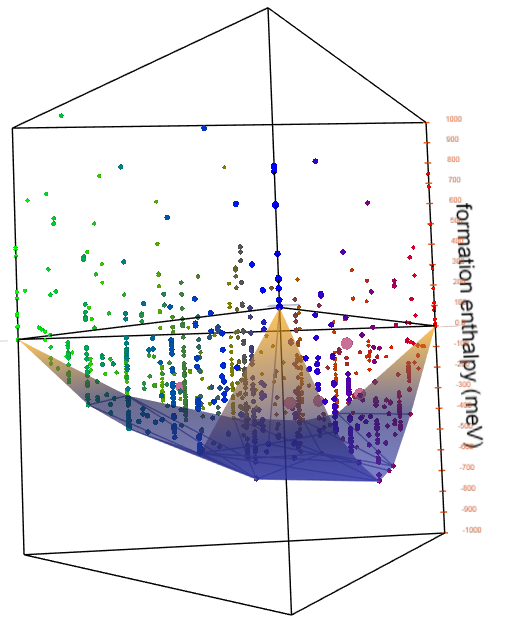

А проекция этой поверхности и всех её изолиний на плоскость выглядит следующим образом:

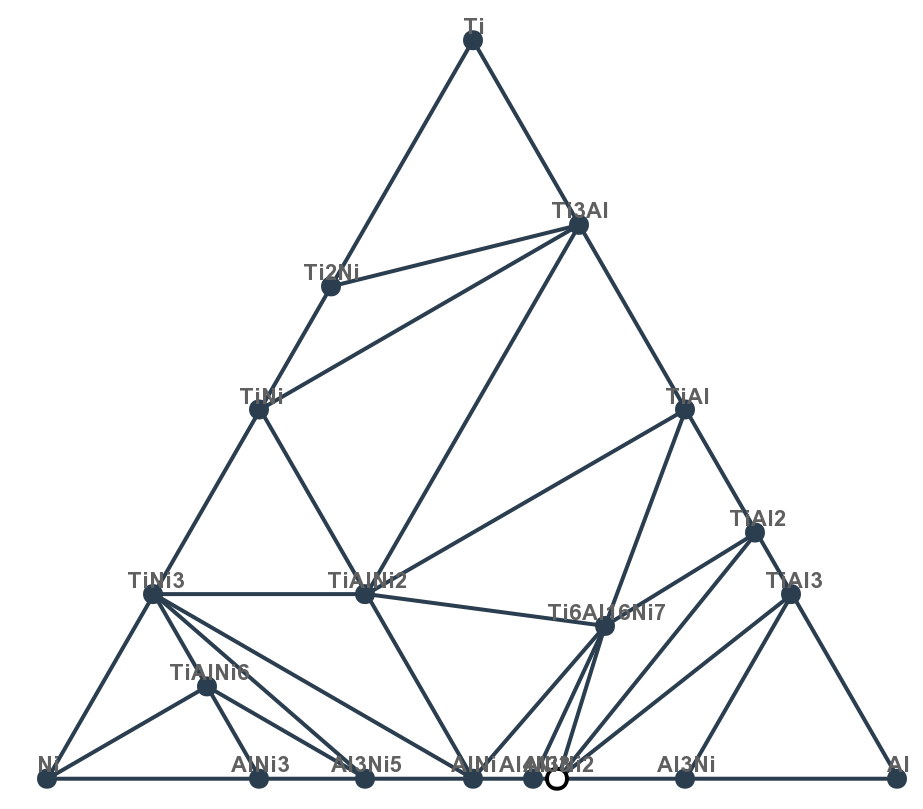

***Попробуйте ответить на вопрос:**
По какому принципу изолинии на проекции содиняют ближайшие точки? Почему $TiAlNi_2$ не соединяется с $TiAlNi_6$

## Поиск стабильных соединений

Из полученных данных выберем ту запись, в которой $E_{hull} = 0$

In [ ]:
for i in data:
    if i['e_above_hull'] == 0:
        stable = i

Посмотрим на упругие свойства стабильных соединения:

In [ ]:
elasticity_stable = stable['elasticity']
elasticity_stable

{'G_Reuss': 60.0,
 'G_VRH': 72.0,
 'G_Voigt': 84.0,
 'G_Voigt_Reuss_Hill': 72.0,
 'K_Reuss': 162.0,
 'K_VRH': 162.0,
 'K_Voigt': 162.0,
 'K_Voigt_Reuss_Hill': 162.0,
 'elastic_anisotropy': 1.99,
 'elastic_tensor': [[208.0, 138.0, 138.0, 0.0, 0.0, 0.0],
  [138.0, 208.0, 138.0, 0.0, 0.0, 0.0],
  [138.0, 138.0, 208.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 117.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 117.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 117.0]],
 'homogeneous_poisson': 0.31,
 'poisson_ratio': 0.31,
 'universal_anisotropy': 1.99,
 'elastic_tensor_original': [[207.8493175988279,
   138.4284771554483,
   138.4284771554483,
   0.0,
   0.0,
   0.0],
  [138.42871781486596, 207.84855674006965, 138.42871781486596, 0.0, 0.0, 0.0],
  [138.43041230772383, 138.43041230772383, 207.8507495841316, 0.0, 0.0, 0.0],
  [0.0005021554276749108,
   0.0002630793508942555,
   0.0005115620711306659,
   116.63879263127006,
   0.0,
   0.0],
  [0.00016847291765413762,
   0.00026275601835558886,
   6.563317139343875e-05,


## Информация о кристаллической структуре. Визуализация структур соединений.

Из полученного словаря можно извлечь полную информацию о структуре использованной для моделирования ячейке.
Полученные строки необходимо сохранить в формате `.cif` - это более широкораспространенный и универсальный аналог формата POSCAR.

**VESTA** - свободно распространяемая программа для визуализации и генерации описания кристаллической структуры. Она поддерживает не только `cif` формат, но и специализированные форматы дял вычислительных пакетов. Подробнее ознакомиться с функционалом программы и скачать её можно на официальном сайте: https://jp-minerals.org/vesta/en/download.html

In [ ]:
#Сохранение в файл запись структуры смоделированной ячейки
cif = stable['cif']
filename = 'struct.cif'
with open(filename, 'w') as f:
    f.write(cif)

Откройте полученный файл  в программе VESTA. Можно ли сказать, что полученная структура относится к кубической?

Сравним занчения параметра `nsites` и количества атомов в моделируемой ячейке:

In [ ]:
with open('struct.cif', 'r') as file:
    read_file = file.read()
print(read_file)
print('nsites from data:', stable['nsites'])

# generated using pymatgen
data_AlNi
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   2.88790200
_cell_length_b   2.88790200
_cell_length_c   2.88790200
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   AlNi
_chemical_formula_sum   'Al1 Ni1'
_cell_volume   24.08503904
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Al  Al0  1  0.00000000  0.00000000  0.00000000  1
  Ni  Ni1  1  0.50000000  0.50000000  0.50000000  1

nsites from data: 2


Значения одинаковы

Рассмотрим объемы ячейки, содержащиеся в загруженных данных. Всего можно обнаружить 2 значения:

In [ ]:
tag = '_cell_volume'
with open('struct.cif', 'r') as file:
    for line in file:
        if tag in line:
            print('volume from cif:', line, end='')
print('volume from data:', stable['volume'])

volume from cif: _cell_volume   24.08503904
volume from data: 24.085039035272114


Поскольку приведенные объемы относятся к моделируемой ячейке в целом, то сравнить данные о кристаллической структуре будет невозможно, т.к. для разных случаев могут быть использованы разные количества атомов (`nsites`), даже для одного и того же вещества. Поэтому, этот параметр необходимо привести к такому универсальному виду, в котором его можно будет сравнить с другими результатами расчетов.

**Вопрос:** Каким образом это можно сделать?

## Использование Pandas для обработки данных

Для наглядности и последующего удобства использования данных предлагается использовать формат Pandas.DataFrame

Подробнее: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [ ]:
df = pd.DataFrame.from_dict(data)
df
#pay attention on digital and text formatted data